<ipython-input-4-bab189445cd4>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


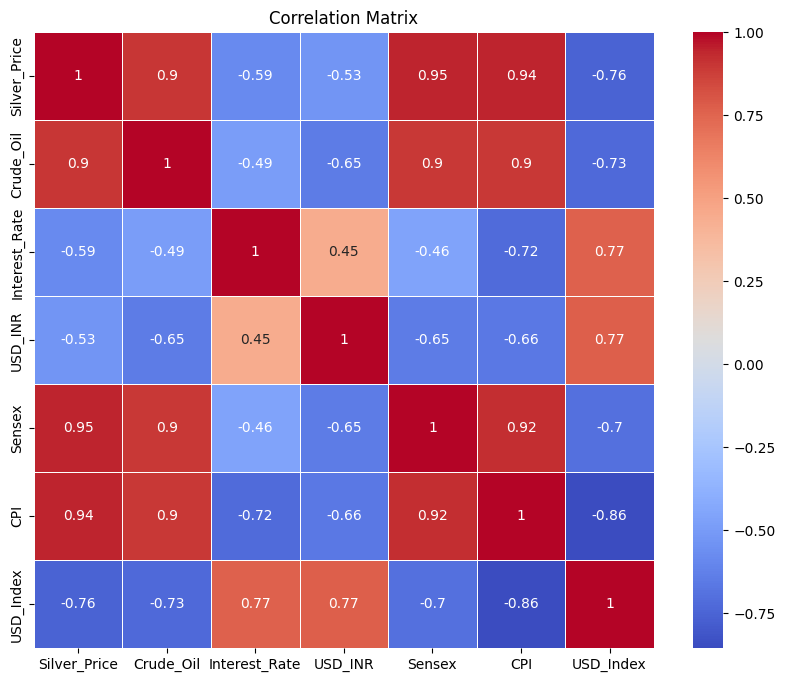

KNN Accuracy: 93.85%
EDA Accuracy: 70.96%


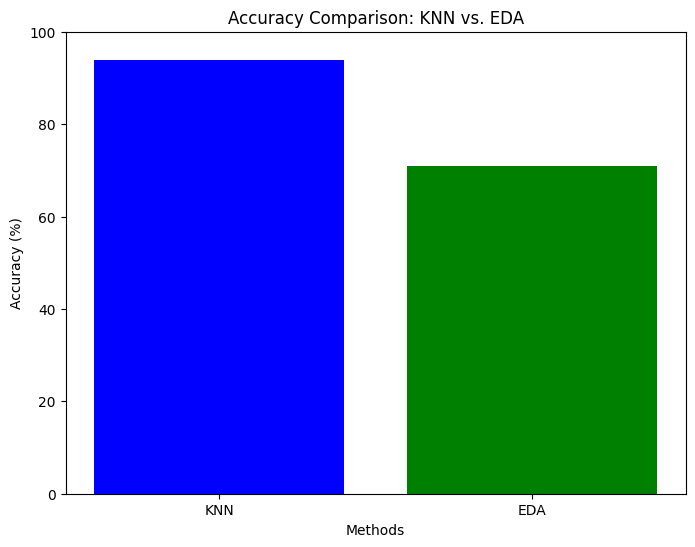

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Book3.csv')

# Exploratory Data Analysis (EDA)
# Visualize the correlation matrix using a heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Feature selection
features = ['Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']
target = ['Silver_Price']
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train.values.ravel())
knn_predictions = knn_model.predict(X_test_scaled)

# Calculate RMSE for KNN model
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))

# EDA Accuracy Calculation (Assuming a simple EDA-based prediction)
# Define your EDA-based prediction logic here
# For example, predict using the mean value of Gold_Price
eda_predictions = np.full_like(y_test, fill_value=y_train.mean())

# Calculate RMSE for EDA-based prediction
eda_rmse = np.sqrt(mean_squared_error(y_test, eda_predictions))

# Calculate accuracy for KNN and EDA
accuracy_knn = 100 - (knn_rmse / y_test.mean() * 100)
accuracy_eda = 100 - (eda_rmse / y_test.mean() * 100)

# Convert accuracy values to float and format the output
accuracy_knn = float(accuracy_knn)
accuracy_eda = float(accuracy_eda)

# Print accuracy values
print(f'KNN Accuracy: {accuracy_knn:.2f}%')
print(f'EDA Accuracy: {accuracy_eda:.2f}%')

# Accuracy values for KNN and EDA
accuracy_values = [accuracy_knn, accuracy_eda]
methods = ['KNN', 'EDA']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracy_values, color=['blue', 'green'])
plt.xlabel('Methods')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: KNN vs. EDA')
plt.ylim(0, 100)  # Set the y-axis limit to [0, 100]
plt.show()

KNN Accuracy: 95.15%
Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 502019328.0000
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 502006112.0000
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 501986016.0000
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 501943040.0000
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 501835264.0000
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 501541632.0000
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 500698784.0000
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 498079936.0000
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 490939456.0000
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 470960128.0000
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: 423792800.0000
Epoch 12/50
6/6 [=========================

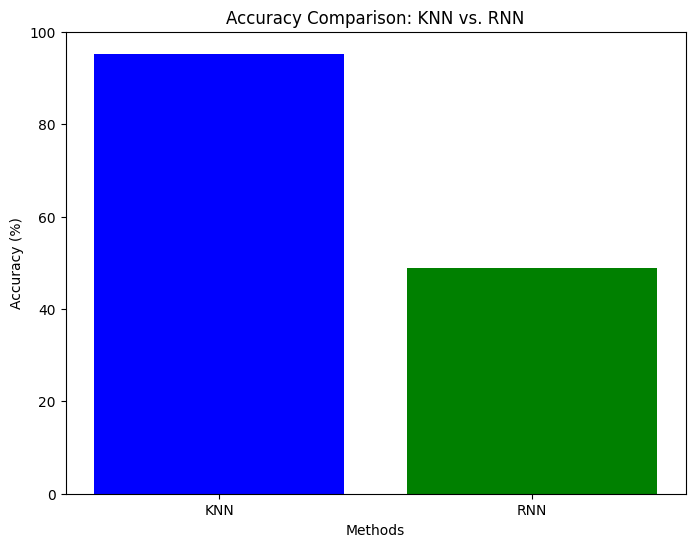

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Book13.csv')

# Feature selection
features = ['Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']
target = ['Silver_Price']
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train.values.ravel())
knn_predictions = knn_model.predict(X_test_scaled)

# Calculate RMSE for KNN model
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))

# Calculate accuracy for KNN
accuracy_knn = 100 - (knn_rmse / y_test.mean() * 100)

# Print KNN accuracy
accuracy_knn = float(accuracy_knn)  # Convert to float
print(f'KNN Accuracy: {accuracy_knn:.2f}%')

# RNN Model
rnn_model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the input data for the RNN
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train the RNN model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

# Make predictions using the RNN model
rnn_predictions = rnn_model.predict(X_test_rnn)

# Calculate RMSE for RNN-based prediction
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))

# Calculate accuracy for RNN
accuracy_rnn = 100 - (rnn_rmse / y_test.mean() * 100)

# Convert accuracy values to float and format the output
accuracy_knn = float(accuracy_knn)
accuracy_rnn = float(accuracy_rnn)

# Print RNN accuracy
print(f'RNN Accuracy: {accuracy_rnn:.2f}%')

# Create a bar chart comparing KNN and RNN accuracy
accuracy_values = [accuracy_knn, accuracy_rnn]
methods = ['KNN', 'RNN']

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracy_values, color=['blue', 'green'])
plt.xlabel('Methods')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: KNN vs. RNN')
plt.ylim(0, 100)  # Set the y-axis limit to [0, 100]
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KNN Accuracy: 95.15%
Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 502023360.0000
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 502018848.0000
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 502013536.0000
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 502006752.0000
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 501996480.0000
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 501977184.0000
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 501934528.0000
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 501817248.0000
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 501379648.0000
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 499787136.0000
Epoch 11/50
6/6 [==============================] - 0s 4ms/step - loss: 494194464.0000
Epoch 12/50
6/6 [=========================

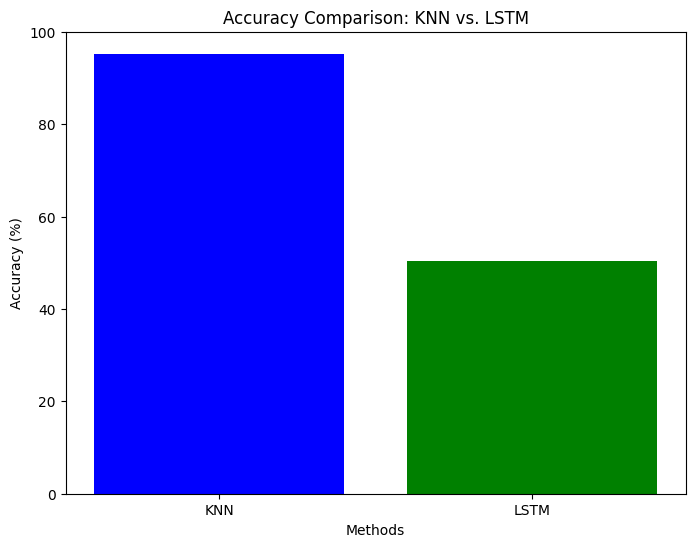

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Book13.csv')

# Feature selection
features = ['Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']
target = ['Silver_Price']
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train.values.ravel())
knn_predictions = knn_model.predict(X_test_scaled)

# Calculate RMSE for KNN model
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))

# Calculate accuracy for KNN
accuracy_knn = 100 - (knn_rmse / y_test.mean() * 100)

# Print KNN accuracy
accuracy_knn = float(accuracy_knn)  # Convert to float
print(f'KNN Accuracy: {accuracy_knn:.2f}%')

# LSTM Model
input_shape = (X_train_scaled.shape[1], 1)
lstm_model = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=input_shape),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the input data for the LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32)

# Make predictions using the LSTM model
lstm_predictions = lstm_model.predict(X_test_lstm)

# Calculate RMSE for LSTM-based prediction
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))

# Calculate accuracy for LSTM
accuracy_lstm = 100 - (lstm_rmse / y_test.mean() * 100)

# Convert accuracy values to float and format the output
accuracy_knn = float(accuracy_knn)
accuracy_lstm = float(accuracy_lstm)

# Print LSTM accuracy
print(f'LSTM Accuracy: {accuracy_lstm:.2f}%')

# Create a bar chart comparing KNN and LSTM accuracy
accuracy_values = [accuracy_knn, accuracy_lstm]
methods = ['KNN', 'LSTM']

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracy_values, color=['blue', 'green'])
plt.xlabel('Methods')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: KNN vs. LSTM')
plt.ylim(0, 100)  # Set the y-axis limit to [0, 100]
plt.show()


KNN Accuracy: 95.15%
SVM Accuracy: 41.30%


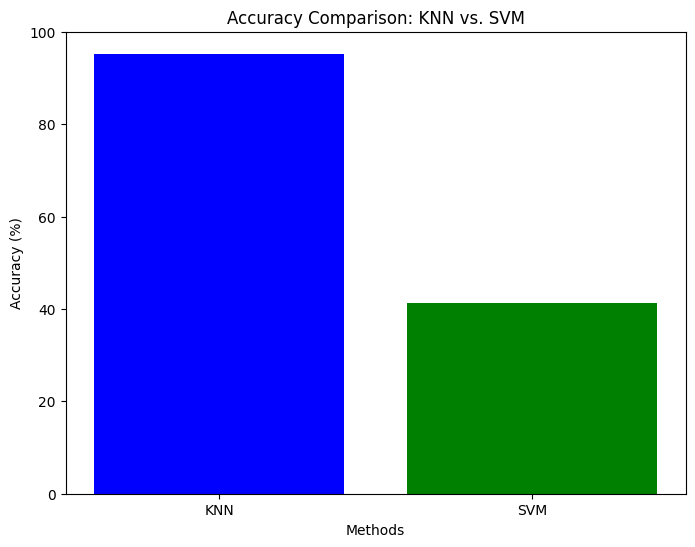

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR  # Import Support Vector Machine (SVM) for regression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Book13.csv')

# Feature selection
features = ['Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']
target = ['Silver_Price']
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train.values.ravel())
knn_predictions = knn_model.predict(X_test_scaled)

# Calculate RMSE for KNN model
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))

# Calculate accuracy for KNN
accuracy_knn = 100 - (knn_rmse / y_test.mean() * 100)

# Print KNN accuracy
accuracy_knn = float(accuracy_knn)  # Convert to float
print(f'KNN Accuracy: {accuracy_knn:.2f}%')

# SVM Model
svm_model = SVR(kernel='linear')  # You can change the kernel to 'rbf' or other options
svm_model.fit(X_train_scaled, y_train.values.ravel())
svm_predictions = svm_model.predict(X_test_scaled)

# Calculate RMSE for SVM-based prediction
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))

# Calculate accuracy for SVM
accuracy_svm = 100 - (svm_rmse / y_test.mean() * 100)

# Convert accuracy values to float and format the output
accuracy_knn = float(accuracy_knn)
accuracy_svm = float(accuracy_svm)

# Print SVM accuracy
print(f'SVM Accuracy: {accuracy_svm:.2f}%')

# Create a bar chart comparing KNN and SVM accuracy
accuracy_values = [accuracy_knn, accuracy_svm]
methods = ['KNN', 'SVM']

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracy_values, color=['blue', 'green'])
plt.xlabel('Methods')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: KNN vs. SVM')
plt.ylim(0, 100)  # Set the y-axis limit to [0, 100]
plt.show()
